https://post.naver.com/viewer/postView.nhn?volumeNo=29700625&memberNo=35871176&vType=VERTICAL

In [2]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [34]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
!unzip -qq "/content/gdrive/MyDrive/open (5).zip"

In [58]:
import pandas as pd

In [106]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [107]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [108]:
train

,ID,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,TRAIN_00000,0.3341,0.9231,10,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175,trap
1,TRAIN_00001,0.6344,0.5955,10,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513,techno
2,TRAIN_00002,0.3983,0.1107,8,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151,Trap Metal
3,TRAIN_00003,0.3139,0.9702,2,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246,trap
4,TRAIN_00004,0.0735,0.9452,5,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25378,TRAIN_25378,0.8814,0.3398,6,0.4602,0.3825,0.4505,0.0000,0.4222,0.8753,0.4081,88,Underground Rap
25379,TRAIN_25379,0.7505,0.5657,0,0.6682,0.1038,0.1281,0.0000,0.0596,0.9583,0.4273,123,Trap Metal
25380,TRAIN_25380,0.2520,0.7617,8,0.4928,0.0410,0.0003,0.8395,0.0843,0.1372,0.7828,353,dnb
25381,TRAIN_25381,0.6202,0.3455,0,0.6499,0.7960,0.4818,0.0000,0.2007,0.0194,0.9756,120,Dark Trap


In [109]:
test

,ID,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,TEST_00000,0.8861,0.6821,2,0.7241,0.3103,0.1451,0.0000,0.5087,0.8863,0.9648,279
1,TEST_00001,0.8495,0.3883,1,0.4495,0.4661,0.6234,0.0004,0.1347,0.4062,0.9051,151
2,TEST_00002,0.2479,0.7549,3,0.7683,0.3131,0.5718,0.0000,0.1250,0.6357,0.3234,196
3,TEST_00003,0.6344,0.9804,1,0.6599,0.0931,0.0020,0.6016,0.8799,0.8790,0.2946,207
4,TEST_00004,0.6237,0.6926,6,0.6716,0.0269,0.0283,0.0001,0.1580,0.9288,0.3642,196
...,...,...,...,...,...,...,...,...,...,...,...,...
16917,TEST_16917,0.5461,0.8686,1,0.6351,0.0656,0.0010,0.8888,0.0047,0.8250,0.2672,161
16918,TEST_16918,0.8443,0.4194,4,0.5065,0.4315,0.1637,0.0241,0.0749,0.9482,0.9186,289
16919,TEST_16919,0.3373,0.9202,10,0.7272,0.4502,0.0791,0.0001,0.1881,0.0992,0.5953,212
16920,TEST_16920,0.4017,0.9741,9,0.6272,0.0768,0.0001,0.8718,0.6649,0.4463,0.4841,617


In [110]:
train_columns = pd.DataFrame({'columns':train.columns,
                             'info':['아이디','(음악 등이) 댄스에 적합함.','에너지','키(음높이?)','소리의 세기','언어능력','반주구간','기약성','활기참','발렌스','템포','재생길이','장르']})

In [111]:
train_columns

,columns,info
0,ID,아이디
1,danceability,(음악 등이) 댄스에 적합함.
2,energy,에너지
3,key,키(음높이?)
4,loudness,소리의 세기
5,speechiness,언어능력
6,acousticness,반주구간
7,instrumentalness,기약성
8,liveness,활기참
9,valence,발렌스


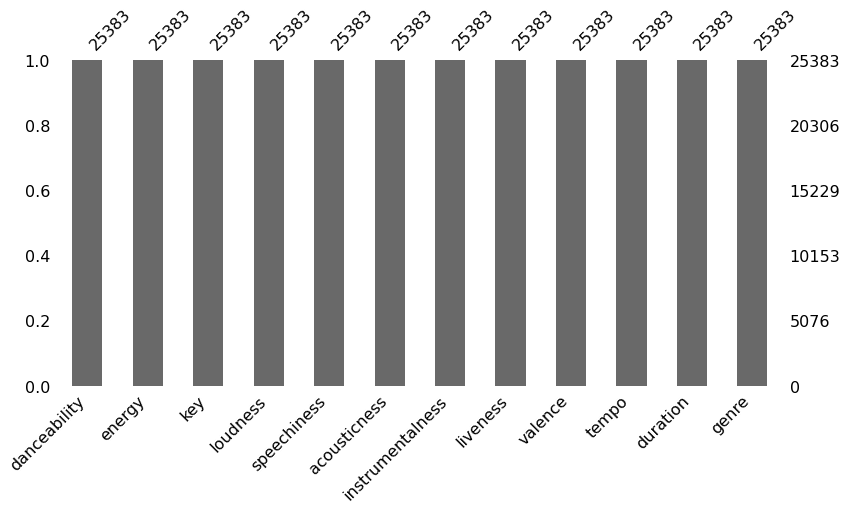

In [112]:
# 결측치를 살피는 함수
import missingno as msno

train_copy = train.copy()
msno.bar(df=train_copy.iloc[:, 1:20], figsize=(13,6))


In [113]:
# 데이터 모양을 보여주는 함수
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['첫번째 값'] = df.loc[0].values
  summary['두번째 값'] = df.loc[1].values
  summary['세번째 값'] = df.loc[2].values

  return summary
  
resumetable(train)

데이터셋 형상: (25383, 13)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫번째 값,두번째 값,세번째 값
0,ID,object,0,25383,TRAIN_00000,TRAIN_00001,TRAIN_00002
1,danceability,float64,0,824,0.3341,0.6344,0.3983
2,energy,float64,0,852,0.9231,0.5955,0.1107
3,key,int64,0,12,10,10,8
4,loudness,float64,0,7687,0.854,0.2826,0.2459
5,speechiness,float64,0,1344,0.3797,0.1378,0.0247
6,acousticness,float64,0,1912,0.008,0.0,0.774
7,instrumentalness,float64,0,1685,0.0002,0.7137,0.0
8,liveness,float64,0,1581,0.7697,0.1597,0.5105
9,valence,float64,0,1571,0.7902,0.4162,0.4291


object형 데이터가 없음..

그나마 key값이 object 데이터와 유사하다.
빼고는 수치형인거 같은데

#데이터 살피기

In [114]:
def identify_count(df, col):

  print(df[col].unique())

  print(df[col].value_counts())

  sns.countplot(data=df, x=col)
  plt.show()

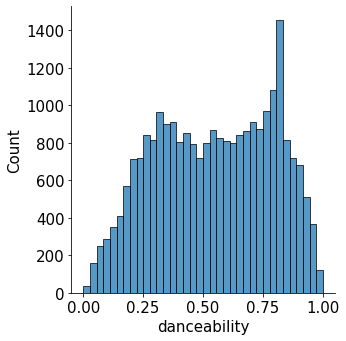

In [115]:
mpl.rc('font',size=15)
sns.displot(train['danceability']);

데이터의 정규화가 잘되어 있다.

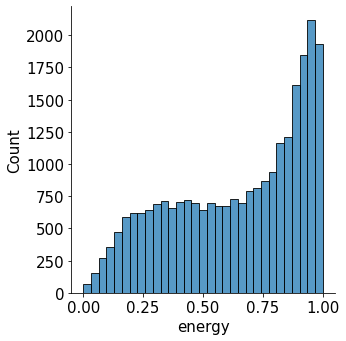

In [116]:
mpl.rc('font',size=15)
sns.displot(train['energy']);

정규분포의 모습이랑 좀 거리가 멀다. 이건 로그화를 해야 할듯

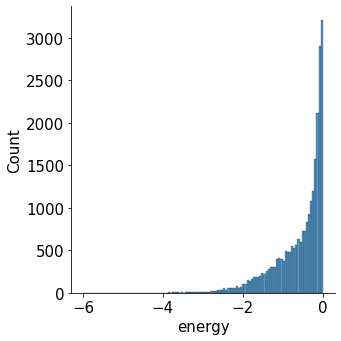

In [117]:

sns.displot(np.log(train['energy']))

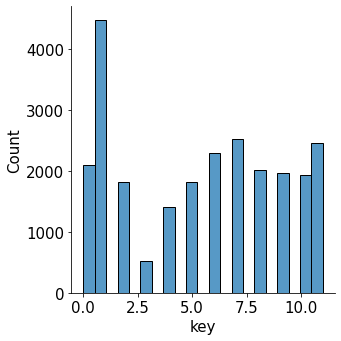

In [118]:
mpl.rc('font',size=15)
sns.displot(train['key']);

key값은 아무래도 object로 바꾸어야 한다.

[10  8  2  5  4  0  7  1  3  6 11  9]
1     4486
7     2523
11    2464
6     2298
0     2102
8     2013
9     1973
10    1936
5     1828
2     1826
4     1408
3      526
Name: key, dtype: int64


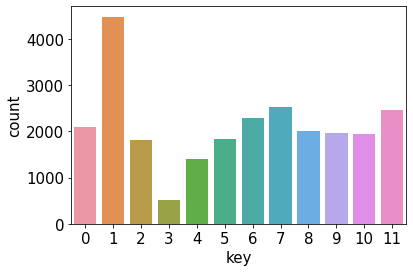

In [119]:
identify_count(train, 'key')

1이 차지하는 비중이 가장 높고 3이 가장 낮다.

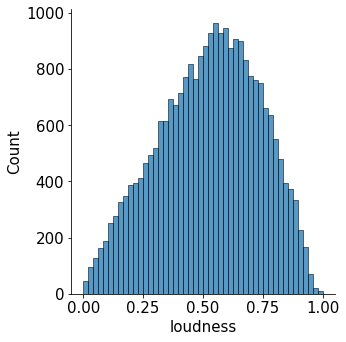

In [120]:
mpl.rc('font',size=15)
sns.displot(train['loudness']);

데이터의 정규화가 잘 되어 있다.

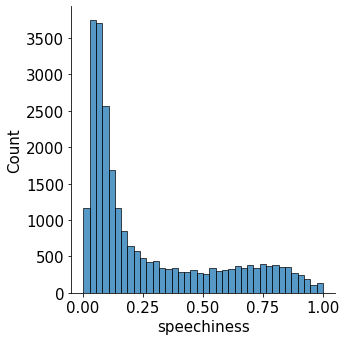

In [121]:
mpl.rc('font',size=15)
sns.displot(train['speechiness']);

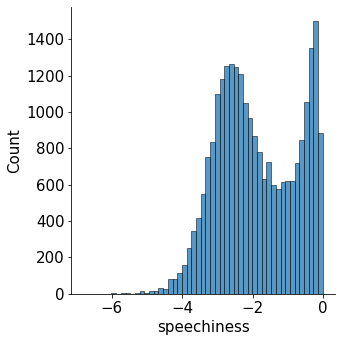

In [122]:
sns.displot(np.log(train['speechiness']))

이건 로그 변환이 필요함.

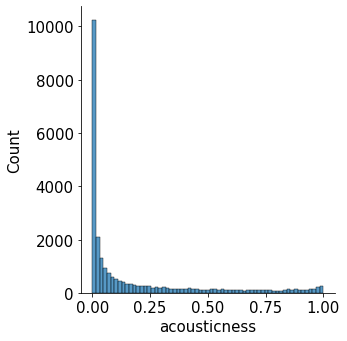

In [123]:
mpl.rc('font',size=15)
sns.displot(train['acousticness']);

이것도 로그 변환이 필요함.

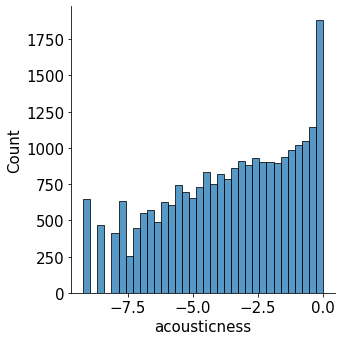

In [124]:
sns.displot(np.log(train['acousticness']))

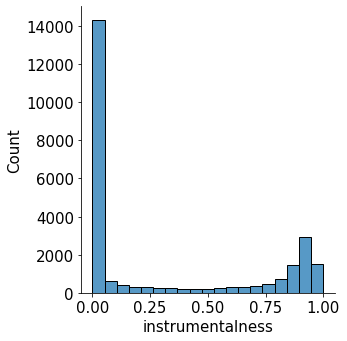

In [125]:
mpl.rc('font',size=15)
sns.displot(train['instrumentalness']);

이것도 로그 변환이 필요함.



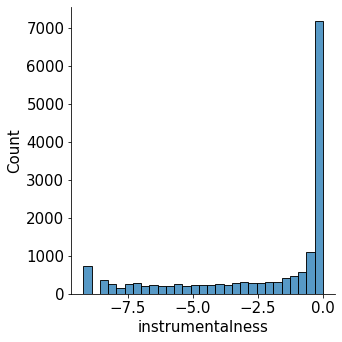

In [126]:
sns.displot(np.log(train['instrumentalness']))

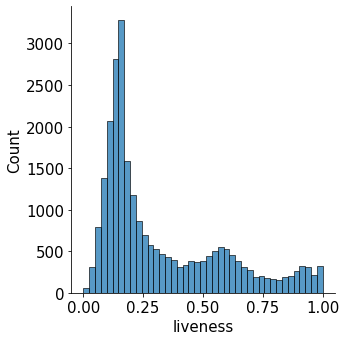

In [127]:
mpl.rc('font',size=15)
sns.displot(train['liveness']);

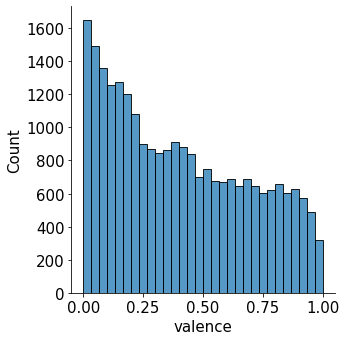

In [128]:

mpl.rc('font',size=15)
sns.displot(train['valence']);

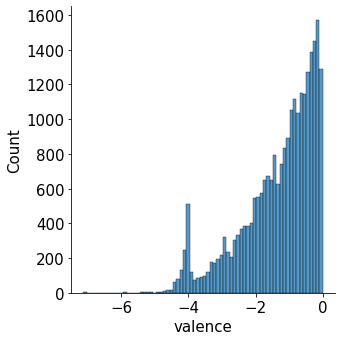

In [129]:
sns.displot(np.log(train['valence']))

이것도 로그를 취해야 함.

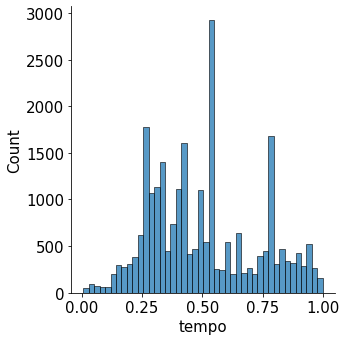

In [130]:
mpl.rc('font',size=15)
sns.displot(train['tempo']);

이건 그나마 양호

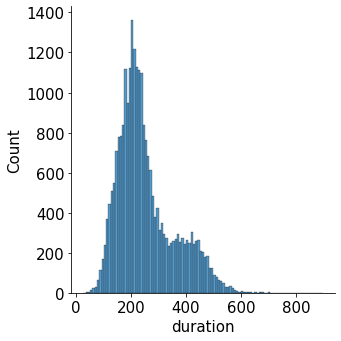

In [131]:
mpl.rc('font',size=15)
sns.displot(train['duration']);

이건 양호

데이터를 둘러본 소감..

key를 제외하고는 실질적인 object 변수가 없다.

다 연속형 데이터임.

그리고 거의 다 로그를 취해서 데이터가 정규분포를 가지도록 만들어 줘야함.

근데 로그를 써도 별로 달라진게 없다...

이거 target 값과 상관관계를 알 수 없음.

In [132]:
train

,ID,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,TRAIN_00000,0.3341,0.9231,10,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175,trap
1,TRAIN_00001,0.6344,0.5955,10,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513,techno
2,TRAIN_00002,0.3983,0.1107,8,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151,Trap Metal
3,TRAIN_00003,0.3139,0.9702,2,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246,trap
4,TRAIN_00004,0.0735,0.9452,5,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25378,TRAIN_25378,0.8814,0.3398,6,0.4602,0.3825,0.4505,0.0000,0.4222,0.8753,0.4081,88,Underground Rap
25379,TRAIN_25379,0.7505,0.5657,0,0.6682,0.1038,0.1281,0.0000,0.0596,0.9583,0.4273,123,Trap Metal
25380,TRAIN_25380,0.2520,0.7617,8,0.4928,0.0410,0.0003,0.8395,0.0843,0.1372,0.7828,353,dnb
25381,TRAIN_25381,0.6202,0.3455,0,0.6499,0.7960,0.4818,0.0000,0.2007,0.0194,0.9756,120,Dark Trap


In [133]:
le = LabelEncoder()

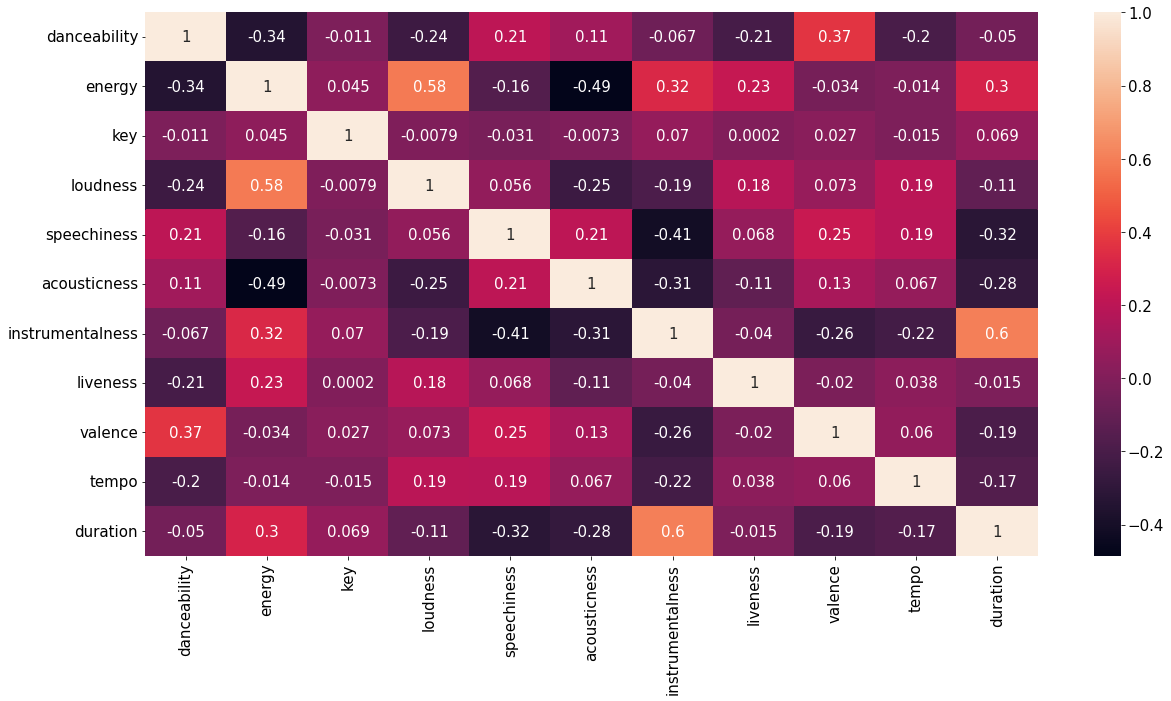

In [134]:
#상관분석하기
#각 변수가 어떤 상관 관계가 있는지. 수치가 높을수록 관계가 있다는 것이다.
fig = plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [135]:
train_columns

,columns,info
0,ID,아이디
1,danceability,(음악 등이) 댄스에 적합함.
2,energy,에너지
3,key,키(음높이?)
4,loudness,소리의 세기
5,speechiness,언어능력
6,acousticness,반주구간
7,instrumentalness,기약성
8,liveness,활기참
9,valence,발렌스


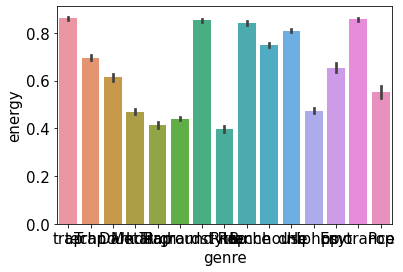

In [136]:
sns.barplot(x='genre',y = 'energy',data=train)


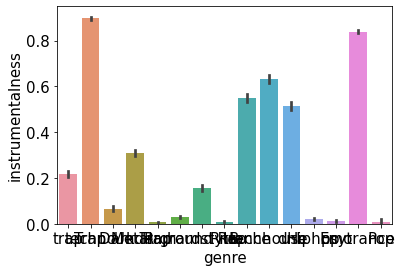

In [137]:
sns.barplot(x='genre',y = 'instrumentalness',data=train)

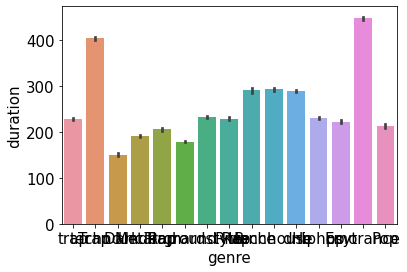

In [138]:
sns.barplot(x='genre',y = 'duration',data=train)

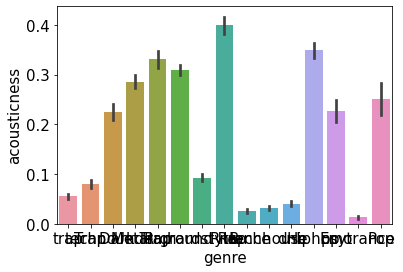

In [139]:
sns.barplot(x='genre',y = 'acousticness',data=train)

In [140]:
from lightgbm import LGBMClassifier

In [141]:
xgb = LGBMClassifier()

In [142]:
# X는 독립변수이므로 종속변수를 제거합니다. 또한 target 이외의 문자열 데이터를 제거합니다.
X = train.drop(["ID", "genre"], axis = 1)
# y는 종속변수로 값을 설정합니다.
y = train[['genre']]

# train에서와 마찬가지로 문자열이 포함된 특성은 제거합니다.
test = test.drop(["ID"], axis = 1)

In [143]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [144]:
xgb.fit(X_train,y_train)

LGBMClassifier()

In [145]:
val_pred = xgb.predict(X_valid)

# Macro f1 score을 사용하기 위해 average 인자 값을 "macro" 로 설정해줍니다.
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.6446763274183817입니다.


In [146]:
pred = xgb.predict(test)

In [147]:
submission = pd.read_csv("./sample_submission.csv")
submission["genre"] = pred

In [148]:
submission

,ID,genre
0,TEST_00000,Hiphop
1,TEST_00001,Underground Rap
2,TEST_00002,Emo
3,TEST_00003,techhouse
4,TEST_00004,RnB
...,...,...
16917,TEST_16917,techhouse
16918,TEST_16918,Hiphop
16919,TEST_16919,hardstyle
16920,TEST_16920,psytrance


In [149]:
# 해당 파일을 다운로드 받아서 제출해주세요.
submission.to_csv("./submit.csv", index = False)

val  0.6446763274183817 real 0.6473848994